In [1]:
from random import *
from time import *
import math
import sys
import matplotlib.pyplot as plt

In [2]:
def test_uniformity(gen, nb):
    dico = {}
    for i in range(nb):
        tmp = str(gen())
        if tmp in dico:
            dico[tmp] += 1
        else:
             dico[tmp] = 1
    print("nb:", len(dico))
    for key in dico:
        print(key, "{0:.2f}".format(dico[key] / nb * 100))

def plot_time(gen, mini, maxi, step):
    sizes, timings = [], []
    nb = 100
    for i in range(mini, maxi, step):
        sizes.append(i)        
        t1 = time()
        for k in range(nb):
            gen(i)
        timings.append((time() - t1) / nb)
    plt.plot(sizes, timings)
    plt.show()
    
def plot_values(gen, mini, maxi, step):
    sizes, values = [], []
    nb = 100
    for i in range(mini, maxi, step):
        sizes.append(i)        
        v = 0
        for k in range(nb):
            v += gen(i)
        values.append(v / nb)
    plt.plot(sizes,values)
    plt.show()

In [3]:
n = 2000
t_start = time()

catalan = [1] # on peut aussi utliser de la memoization avec @functools.cache
for i in range(1,n):
    catalan.append(sum(catalan[j] * catalan[i-j-1] for j in range(i)))

print("{1:.2f} sec. to compute {0} catalan numbers : ".format(n, time() - t_start))
print(catalan[:10])

3.75 sec. to compute 2000 catalan numbers : 
[1, 1, 2, 5, 14, 42, 132, 429, 1430, 4862]


In [4]:
def uniform_cut(n) : #choisir $i$ avec probabilité $p_i=c_ic_{n-i-1}/{c_n}$ 
    u = random()
    i, s = 0, catalan[0] * catalan[n-1] / catalan[n]
    while u > s :
        i += 1
        s += catalan[i] * catalan[n-i-1] / catalan[n]
    return i

def random_binary_tree_rec(n):
    if n == 0:
        return []
    i = uniform_cut(n) # $O(n)$
    return ['z', random_binary_tree_rec(i), random_binary_tree_rec(n-i-1)]

def random_binary_tree_height(n):
    if n == 0:
        return 0
    i = uniform_cut(n) # $O(n)$
    return 1 + max(random_binary_tree_height(i), random_binary_tree_height(n-i-1))

In [5]:
print(random_binary_tree_rec(10))

['z', [], ['z', ['z', ['z', ['z', [], []], []], ['z', ['z', [], []], []]], ['z', ['z', [], []], ['z', [], []]]]]


In [6]:
print(random_binary_tree_height(100))

36


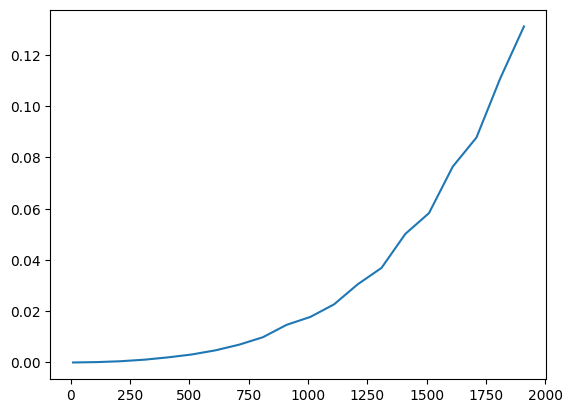

In [7]:
plot_time(random_binary_tree_height, 10, 2000, 100)

In [8]:
test_uniformity(lambda : random_binary_tree_rec(3), 10000000)

nb: 5
['z', [], ['z', ['z', [], []], []]] 19.98
['z', ['z', [], ['z', [], []]], []] 20.01
['z', ['z', [], []], ['z', [], []]] 20.00
['z', [], ['z', [], ['z', [], []]]] 20.01
['z', ['z', ['z', [], []], []], []] 20.01


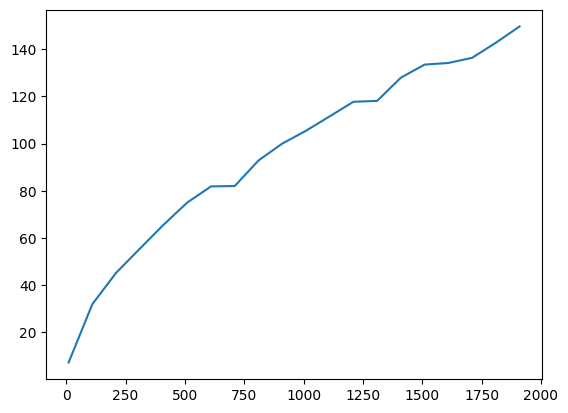

In [9]:
plot_values(random_binary_tree_height, 10, 2000, 100)

In [10]:
def random_shuffle(sigma):
    n = len(sigma)
    for i in range(1,n):
        j = randint(0,i) # dans l'intervalle $[0..i]$ 
        sigma[i],sigma[j]=sigma[j],sigma[i] # échange les cases d'indices $i$ et $j$

def random_permutation(n):
    sigma = [ i for i in range(1,n+1) ]
    random_shuffle(sigma)
    return sigma

def random_binary_tree_rec_labelled(n):
    p=random_permutation(2*n+1)
    def aux(t):
        if t==[]:
            return [p.pop()]
        return [p.pop()]+[aux(tt) for tt in t[1:]]
    return aux(random_binary_tree_rec(n))

In [37]:
import sys
!{sys.executable} -m pip install graphviz

In [59]:
import graphviz

def draw_tree(t):
    dot = graphviz.Graph(graph_attr={'size' : "12,6"}, node_attr={'shape':'circle', 'fillcolor ':'white', 'style':'filled', 'fixedsize':'true'})
    def draw(t,r):
        node = str(t[0])
        if len(t)==1:
            dot.node(node, fillcolor='white', fontcolor='white')
        else : 
            dot.node(node, fillcolor='black', fontcolor='black')
        dot.edge(r, node)
        for st in t[1:]:
            draw(st,node)
    draw(t,'0')
    display(dot)

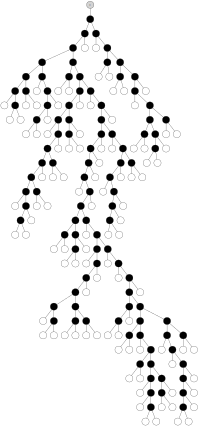

In [61]:
a = random_binary_tree_rec_labelled(100)
draw_tree(a)